In [1]:
#importing system libraries
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
#importing datahandling lib
import numpy as np
import pandas as pd 

In [3]:
#importing data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import required components for image processing
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
ben=os.listdir('/content/ben')

In [6]:
jerry=os.listdir('/content/jerry')

In [7]:
madonna= os.listdir("/content/madonna")

In [8]:
#Reading images as a matrix of numbers
limit=100
benimages=[None]*limit
j=0

for i in ben:
    if(j<limit):
          benimages[j]=imread("/content/ben/"+i)
          j+=1
    else:
          break

In [9]:
limit=100
jerryimages=[None]*limit
j=0

for i in jerry:
    if(j<limit):
          jerryimages[j]=imread("/content/jerry/"+i)
          j+=1
    else:
          break

In [10]:
limit = 100
madonnaimages =[None]*limit
j=0
for i in madonna:
    if(j<limit):
        madonnaimages[j] = imread("/content/madonna/"+i)
        j+=1
    else:
        break

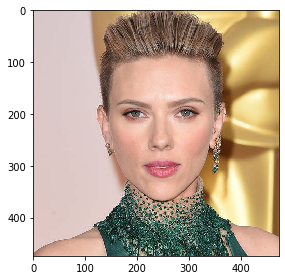

In [11]:
imshow(benimages[4])

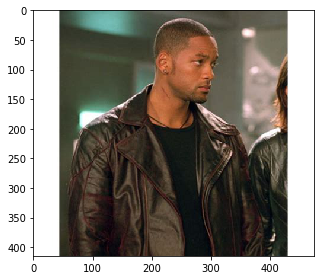

In [12]:
imshow(jerryimages[0])

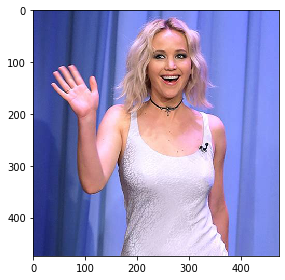

In [13]:
imshow(madonnaimages[0])

In [14]:
benimages_gray=[None]*limit
j=0

for i in ben:
    if(j<limit):
        benimages_gray[j]=rgb2gray(benimages[j])
        j+=1
    else:
        break

In [15]:
jerryimages_gray=[None]*limit
j=0

for i in jerry:
    if(j<limit):
        jerryimages_gray[j]=rgb2gray(jerryimages[j])
        j+=1
    else:
        break

In [16]:
madonnaimages_gray=[None]*limit
j=0
for i in madonna:
    if(j<limit):
        madonnaimages_gray[j]=rgb2gray(madonnaimages[j])
        j+=1
    else:
        break

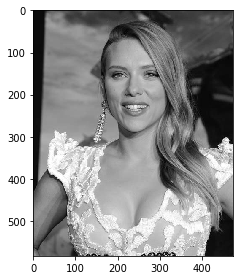

In [17]:
imshow(benimages_gray[3])

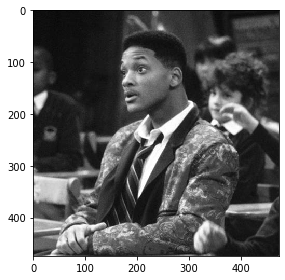

In [18]:
imshow(jerryimages_gray[4])

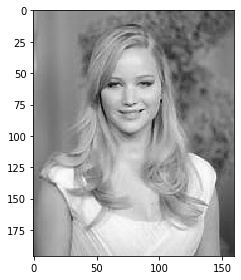

In [19]:
imshow(madonnaimages_gray[7])

In [20]:
benimages_gray[1].shape

(496, 474)

In [21]:
jerryimages_gray[4].shape

(474, 474)

In [22]:
madonnaimages_gray[7].shape

(196, 160)

In [23]:
# matrix resize
for j in range(100):
    be=benimages_gray[j]
    benimages_gray[j]=resize(be,(512,512))

In [24]:

for j in range(100):
    je=jerryimages_gray[j]
    jerryimages_gray[j]=resize(je,(512,512))

In [25]:
for j in range(100):
    ma=madonnaimages_gray[j]
    madonnaimages_gray[j]=resize(ma,(512,512))

In [26]:
benimages_gray[4].shape

(512, 512)

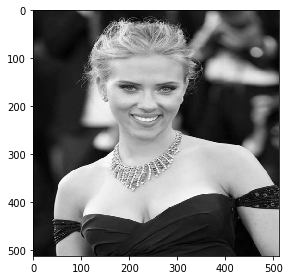

In [27]:
#View resized images
imshow(benimages_gray[5])

In [28]:
benimages_gray[4].shape

(512, 512)

In [29]:
#Image matrix to vector conversion
#find out the no.of grayscale images

len_of_images_be=len(benimages_gray)

In [30]:
len_of_images_be

100

In [31]:
image_size_je=jerryimages_gray[1].shape
image_size_je

(512, 512)

In [32]:
image_size_be=benimages_gray[1].shape
image_size_be

(512, 512)

In [33]:
image_size_ma=madonnaimages_gray[1].shape
image_size_ma

(512, 512)

In [34]:
flatten_size_je=image_size_je[0]*image_size_je[1]
flatten_size_je

262144

In [35]:
flatten_size_be=image_size_be[0]*image_size_be[1]
flatten_size_be

262144

In [36]:
flatten_size_ma=image_size_ma[0]*image_size_ma[1]
flatten_size_ma

262144

In [37]:
#Flattening the arrays
for i in range(len_of_images_be):
    benimages_gray[i]=np.ndarray.flatten(benimages_gray[i]).reshape(flatten_size_be,1)

In [38]:
#Stack the individual image array elements into one array
benimages_gray=np.dstack(benimages_gray)

In [39]:
#change the axis of the array elements
benimages_gray=np.rollaxis(benimages_gray,axis=2,start=0)

In [40]:
benimages_gray.shape

(100, 262144, 1)

In [41]:
benimages_gray=benimages_gray.reshape(len_of_images_be,flatten_size_be)
benimages_gray.shape

(100, 262144)

In [42]:
#Create a dataframe for the image vectors
ben_data=pd.DataFrame(benimages_gray)

In [43]:
ben_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.405785,0.399106,0.392289,0.384512,0.374520,0.363590,0.348580,0.332294,0.312961,0.290021,...,0.053510,0.053510,0.055693,0.059324,0.061353,0.062663,0.065275,0.065275,0.085794,0.242749
1,0.833149,0.830520,0.826982,0.824421,0.830071,0.833059,0.829893,0.825311,0.815913,0.801352,...,0.726215,0.723723,0.717977,0.710847,0.706794,0.706132,0.703040,0.700997,0.716917,0.716917
2,0.558072,0.548319,0.537818,0.534550,0.537587,0.532324,0.512738,0.487016,0.475572,0.484675,...,0.799932,0.793743,0.792981,0.796849,0.801509,0.803857,0.799496,0.796735,0.821269,0.893506
3,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.041229,0.043703,...,0.066964,0.064490,0.063043,0.061151,0.057520,0.055200,0.055200,0.052844,0.063036,0.220089
4,0.828715,0.821912,0.811559,0.806501,0.807997,0.811579,0.813179,0.811441,0.810759,0.813325,...,0.830156,0.817786,0.806182,0.806488,0.810548,0.806619,0.800821,0.811358,0.829072,0.805696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.845804,0.842465,0.835640,0.828379,0.823730,0.820113,0.820539,0.822420,0.826755,0.834162,...,0.535818,0.497021,0.393268,0.359822,0.429699,0.477372,0.433334,0.410222,0.541981,0.632686
96,0.994987,0.994690,0.987866,0.983627,0.985105,0.988474,0.988223,0.986479,0.989112,0.993882,...,0.771406,0.778846,0.784028,0.785767,0.788048,0.793974,0.799714,0.800799,0.799229,0.800198
97,0.785847,0.778199,0.672908,0.651638,0.692407,0.752025,0.775261,0.771617,0.758684,0.737565,...,0.129142,0.138238,0.128493,0.108946,0.099503,0.092532,0.088730,0.100626,0.116110,0.268846
98,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,...,0.285514,0.280723,0.285138,0.292116,0.292993,0.287594,0.285813,0.290987,0.307546,0.357948


In [44]:
ben_data['label']="Scarlett Johansson"

In [45]:
ben_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.405785,0.399106,0.392289,0.384512,0.374520,0.363590,0.348580,0.332294,0.312961,0.290021,...,0.053510,0.055693,0.059324,0.061353,0.062663,0.065275,0.065275,0.085794,0.242749,Scarlett Johansson
1,0.833149,0.830520,0.826982,0.824421,0.830071,0.833059,0.829893,0.825311,0.815913,0.801352,...,0.723723,0.717977,0.710847,0.706794,0.706132,0.703040,0.700997,0.716917,0.716917,Scarlett Johansson
2,0.558072,0.548319,0.537818,0.534550,0.537587,0.532324,0.512738,0.487016,0.475572,0.484675,...,0.793743,0.792981,0.796849,0.801509,0.803857,0.799496,0.796735,0.821269,0.893506,Scarlett Johansson
3,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.041229,0.043703,...,0.064490,0.063043,0.061151,0.057520,0.055200,0.055200,0.052844,0.063036,0.220089,Scarlett Johansson
4,0.828715,0.821912,0.811559,0.806501,0.807997,0.811579,0.813179,0.811441,0.810759,0.813325,...,0.817786,0.806182,0.806488,0.810548,0.806619,0.800821,0.811358,0.829072,0.805696,Scarlett Johansson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.845804,0.842465,0.835640,0.828379,0.823730,0.820113,0.820539,0.822420,0.826755,0.834162,...,0.497021,0.393268,0.359822,0.429699,0.477372,0.433334,0.410222,0.541981,0.632686,Scarlett Johansson
96,0.994987,0.994690,0.987866,0.983627,0.985105,0.988474,0.988223,0.986479,0.989112,0.993882,...,0.778846,0.784028,0.785767,0.788048,0.793974,0.799714,0.800799,0.799229,0.800198,Scarlett Johansson
97,0.785847,0.778199,0.672908,0.651638,0.692407,0.752025,0.775261,0.771617,0.758684,0.737565,...,0.138238,0.128493,0.108946,0.099503,0.092532,0.088730,0.100626,0.116110,0.268846,Scarlett Johansson
98,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,0.271891,...,0.280723,0.285138,0.292116,0.292993,0.287594,0.285813,0.290987,0.307546,0.357948,Scarlett Johansson


In [46]:
len_of_images_je=len(jerryimages_gray)
len_of_images_je

100

In [47]:
image_size_je=jerryimages_gray[1].shape
image_size_je

(512, 512)

In [48]:
flatten_size_je=image_size_je[0]*image_size_je[1]
flatten_size_je

262144

In [49]:
#Flattening the arrays
for i in range(len_of_images_je):
    jerryimages_gray[i]=np.ndarray.flatten(jerryimages_gray[i]).reshape(flatten_size_je,1)

In [50]:
jerryimages_gray=np.dstack(jerryimages_gray)

In [51]:
jerryimages_gray=np.rollaxis(jerryimages_gray,axis=2,start=0)

In [52]:
jerryimages_gray.shape

(100, 262144, 1)

In [53]:
jerryimages_gray=jerryimages_gray.reshape(len_of_images_je,flatten_size_je)
jerryimages_gray.shape

(100, 262144)

In [54]:
#Create a dataframe for the image vectors
jerry_data=pd.DataFrame(jerryimages_gray)
jerry_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.007017,0.007017,0.005356,0.004829,0.004777,0.005081,0.005318,0.006217,0.006383,0.004792,...,0.039147,0.056250,0.067485,0.066155,0.053610,0.036279,0.022403,0.015279,0.037964,0.230095
2,0.582078,0.569210,0.557946,0.552860,0.554070,0.555188,0.553307,0.548331,0.548098,0.551229,...,0.067485,0.058746,0.115780,0.243662,0.316324,0.305540,0.309450,0.296043,0.316453,0.352209
3,0.485729,0.482266,0.478619,0.472086,0.470048,0.470048,0.472078,0.473970,0.472522,0.470048,...,0.220628,0.224741,0.226166,0.220796,0.220367,0.220069,0.221976,0.237203,0.224886,0.301694
4,0.052972,0.053096,0.056306,0.057034,0.057131,0.057266,0.057400,0.057471,0.056184,0.052829,...,0.076420,0.080050,0.083681,0.084339,0.081578,0.077948,0.074459,0.071235,0.088608,0.245795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.099936,0.099936,0.099936,0.109495,0.125671,0.140530,0.154685,0.160200,0.162222,0.164244,...,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420
96,0.057730,0.050826,0.040342,0.032549,0.030580,0.030580,0.030443,0.028577,0.026492,0.026658,...,0.052536,0.039165,0.034724,0.032960,0.027758,0.021093,0.018390,0.023631,0.067430,0.323962
97,0.180158,0.186455,0.190108,0.185278,0.175522,0.169272,0.169933,0.175518,0.162223,0.133064,...,0.178704,0.183180,0.172100,0.161515,0.165888,0.175171,0.169931,0.153729,0.158727,0.239543
98,0.215389,0.215389,0.215389,0.215389,0.215389,0.215389,0.215389,0.215389,0.212493,0.208659,...,0.177859,0.191252,0.196211,0.187972,0.174818,0.164907,0.159528,0.157357,0.164413,0.277723


In [55]:
jerry_data['label']="Will Smith"

In [56]:
jerry_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Will Smith
1,0.007017,0.007017,0.005356,0.004829,0.004777,0.005081,0.005318,0.006217,0.006383,0.004792,...,0.056250,0.067485,0.066155,0.053610,0.036279,0.022403,0.015279,0.037964,0.230095,Will Smith
2,0.582078,0.569210,0.557946,0.552860,0.554070,0.555188,0.553307,0.548331,0.548098,0.551229,...,0.058746,0.115780,0.243662,0.316324,0.305540,0.309450,0.296043,0.316453,0.352209,Will Smith
3,0.485729,0.482266,0.478619,0.472086,0.470048,0.470048,0.472078,0.473970,0.472522,0.470048,...,0.224741,0.226166,0.220796,0.220367,0.220069,0.221976,0.237203,0.224886,0.301694,Will Smith
4,0.052972,0.053096,0.056306,0.057034,0.057131,0.057266,0.057400,0.057471,0.056184,0.052829,...,0.080050,0.083681,0.084339,0.081578,0.077948,0.074459,0.071235,0.088608,0.245795,Will Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.099936,0.099936,0.099936,0.109495,0.125671,0.140530,0.154685,0.160200,0.162222,0.164244,...,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,0.713420,Will Smith
96,0.057730,0.050826,0.040342,0.032549,0.030580,0.030580,0.030443,0.028577,0.026492,0.026658,...,0.039165,0.034724,0.032960,0.027758,0.021093,0.018390,0.023631,0.067430,0.323962,Will Smith
97,0.180158,0.186455,0.190108,0.185278,0.175522,0.169272,0.169933,0.175518,0.162223,0.133064,...,0.183180,0.172100,0.161515,0.165888,0.175171,0.169931,0.153729,0.158727,0.239543,Will Smith
98,0.215389,0.215389,0.215389,0.215389,0.215389,0.215389,0.215389,0.215389,0.212493,0.208659,...,0.191252,0.196211,0.187972,0.174818,0.164907,0.159528,0.157357,0.164413,0.277723,Will Smith


In [57]:
len_of_images_ma=len(madonnaimages_gray)
len_of_images_ma

100

In [58]:
image_size_ma=madonnaimages_gray[1].shape
image_size_ma

(512, 512)

In [59]:
flatten_size_ma=image_size_ma[0]*image_size_ma[1]
flatten_size_ma

262144

In [60]:
#Flattening the arrays
for i in range(len_of_images_ma):
    madonnaimages_gray[i]=np.ndarray.flatten(madonnaimages_gray[i]).reshape(flatten_size_ma,1)

In [61]:
madonnaimages_gray=np.dstack(madonnaimages_gray)

In [62]:
madonnaimages_gray=np.rollaxis(madonnaimages_gray,axis=2,start=0)
madonnaimages_gray.shape

(100, 262144, 1)

In [63]:
madonnaimages_gray=madonnaimages_gray.reshape(len_of_images_ma,flatten_size_ma)
madonnaimages_gray.shape

(100, 262144)

In [64]:
#Create a dataframe for the image vectors
madonna_data=pd.DataFrame(madonnaimages_gray)
madonna_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.282802,0.279462,0.275832,0.274996,0.274770,0.276996,0.281786,0.286497,0.284129,0.277507,...,0.559765,0.560272,0.560568,0.560431,0.560285,0.560285,0.560144,0.564103,0.583489,0.585326
1,0.795006,0.788327,0.777872,0.775477,0.775593,0.778010,0.779462,0.777712,0.777137,0.779611,...,0.806714,0.806714,0.806714,0.806714,0.806714,0.806714,0.806714,0.809784,0.820206,0.796829
2,0.059697,0.063037,0.066667,0.072991,0.080734,0.085953,0.090731,0.093692,0.095239,0.098871,...,0.930202,0.933537,0.938654,0.934411,0.909855,0.895517,0.910632,0.921585,0.938479,0.896683
3,0.690689,0.684010,0.673555,0.668588,0.670116,0.673693,0.675294,0.673555,0.674267,0.678059,...,0.087997,0.084366,0.082918,0.086702,0.090762,0.089452,0.085821,0.083646,0.106486,0.256762
4,0.500852,0.495605,0.478950,0.470541,0.449076,0.444128,0.461471,0.453552,0.406684,0.360408,...,0.741094,0.733640,0.728449,0.724966,0.722284,0.718488,0.711227,0.701953,0.686701,0.686460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.712184,0.708603,0.704941,0.701310,0.705515,0.715097,0.725989,0.736755,0.747488,0.755983,...,0.244716,0.240812,0.235998,0.228544,0.220635,0.215194,0.209546,0.204672,0.217031,0.291934
96,0.702627,0.699287,0.692463,0.685202,0.680553,0.676922,0.676330,0.677271,0.677271,0.677271,...,0.699652,0.699944,0.699944,0.699944,0.699956,0.700153,0.700332,0.702046,0.711842,0.712198
97,0.534313,0.530974,0.520955,0.511507,0.503707,0.499387,0.496691,0.494506,0.491293,0.486580,...,0.492668,0.492668,0.492668,0.493218,0.493923,0.494090,0.494090,0.498457,0.518064,0.521403
98,0.770227,0.760209,0.752511,0.748153,0.749746,0.751056,0.751056,0.749411,0.750007,0.754556,...,0.800607,0.804371,0.810145,0.813888,0.814274,0.812965,0.810298,0.813131,0.825377,0.818698


In [65]:
madonna_data['label']="Jennifer Lawrence"
madonna_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.282802,0.279462,0.275832,0.274996,0.274770,0.276996,0.281786,0.286497,0.284129,0.277507,...,0.560272,0.560568,0.560431,0.560285,0.560285,0.560144,0.564103,0.583489,0.585326,Jennifer Lawrence
1,0.795006,0.788327,0.777872,0.775477,0.775593,0.778010,0.779462,0.777712,0.777137,0.779611,...,0.806714,0.806714,0.806714,0.806714,0.806714,0.806714,0.809784,0.820206,0.796829,Jennifer Lawrence
2,0.059697,0.063037,0.066667,0.072991,0.080734,0.085953,0.090731,0.093692,0.095239,0.098871,...,0.933537,0.938654,0.934411,0.909855,0.895517,0.910632,0.921585,0.938479,0.896683,Jennifer Lawrence
3,0.690689,0.684010,0.673555,0.668588,0.670116,0.673693,0.675294,0.673555,0.674267,0.678059,...,0.084366,0.082918,0.086702,0.090762,0.089452,0.085821,0.083646,0.106486,0.256762,Jennifer Lawrence
4,0.500852,0.495605,0.478950,0.470541,0.449076,0.444128,0.461471,0.453552,0.406684,0.360408,...,0.733640,0.728449,0.724966,0.722284,0.718488,0.711227,0.701953,0.686701,0.686460,Jennifer Lawrence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.712184,0.708603,0.704941,0.701310,0.705515,0.715097,0.725989,0.736755,0.747488,0.755983,...,0.240812,0.235998,0.228544,0.220635,0.215194,0.209546,0.204672,0.217031,0.291934,Jennifer Lawrence
96,0.702627,0.699287,0.692463,0.685202,0.680553,0.676922,0.676330,0.677271,0.677271,0.677271,...,0.699944,0.699944,0.699944,0.699956,0.700153,0.700332,0.702046,0.711842,0.712198,Jennifer Lawrence
97,0.534313,0.530974,0.520955,0.511507,0.503707,0.499387,0.496691,0.494506,0.491293,0.486580,...,0.492668,0.492668,0.493218,0.493923,0.494090,0.494090,0.498457,0.518064,0.521403,Jennifer Lawrence
98,0.770227,0.760209,0.752511,0.748153,0.749746,0.751056,0.751056,0.749411,0.750007,0.754556,...,0.804371,0.810145,0.813888,0.814274,0.812965,0.810298,0.813131,0.825377,0.818698,Jennifer Lawrence


In [66]:
#Joining dataframes
half=pd.concat([ben_data,jerry_data])

In [67]:
total_data=pd.concat([half,madonna_data])
total_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.405785,0.399106,0.392289,0.384512,0.374520,0.363590,0.348580,0.332294,0.312961,0.290021,...,0.053510,0.055693,0.059324,0.061353,0.062663,0.065275,0.065275,0.085794,0.242749,Scarlett Johansson
1,0.833149,0.830520,0.826982,0.824421,0.830071,0.833059,0.829893,0.825311,0.815913,0.801352,...,0.723723,0.717977,0.710847,0.706794,0.706132,0.703040,0.700997,0.716917,0.716917,Scarlett Johansson
2,0.558072,0.548319,0.537818,0.534550,0.537587,0.532324,0.512738,0.487016,0.475572,0.484675,...,0.793743,0.792981,0.796849,0.801509,0.803857,0.799496,0.796735,0.821269,0.893506,Scarlett Johansson
3,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.039781,0.041229,0.043703,...,0.064490,0.063043,0.061151,0.057520,0.055200,0.055200,0.052844,0.063036,0.220089,Scarlett Johansson
4,0.828715,0.821912,0.811559,0.806501,0.807997,0.811579,0.813179,0.811441,0.810759,0.813325,...,0.817786,0.806182,0.806488,0.810548,0.806619,0.800821,0.811358,0.829072,0.805696,Scarlett Johansson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.712184,0.708603,0.704941,0.701310,0.705515,0.715097,0.725989,0.736755,0.747488,0.755983,...,0.240812,0.235998,0.228544,0.220635,0.215194,0.209546,0.204672,0.217031,0.291934,Jennifer Lawrence
96,0.702627,0.699287,0.692463,0.685202,0.680553,0.676922,0.676330,0.677271,0.677271,0.677271,...,0.699944,0.699944,0.699944,0.699956,0.700153,0.700332,0.702046,0.711842,0.712198,Jennifer Lawrence
97,0.534313,0.530974,0.520955,0.511507,0.503707,0.499387,0.496691,0.494506,0.491293,0.486580,...,0.492668,0.492668,0.493218,0.493923,0.494090,0.494090,0.498457,0.518064,0.521403,Jennifer Lawrence
98,0.770227,0.760209,0.752511,0.748153,0.749746,0.751056,0.751056,0.749411,0.750007,0.754556,...,0.804371,0.810145,0.813888,0.814274,0.812965,0.810298,0.813131,0.825377,0.818698,Jennifer Lawrence


In [68]:
#Shufflling rows
from sklearn.utils import shuffle

In [69]:
data_indexed=shuffle(total_data).reset_index()
data_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,72,0.988565,0.985189,0.984605,0.987475,0.992827,0.995000,0.994569,0.994167,0.993527,...,0.695526,0.697301,0.701943,0.707467,0.715211,0.722416,0.728855,0.744503,0.745472,Scarlett Johansson
1,44,0.833149,0.830520,0.826982,0.824421,0.830071,0.833059,0.829893,0.825311,0.815913,...,0.723723,0.717977,0.710847,0.706794,0.706132,0.703040,0.700997,0.716917,0.716917,Scarlett Johansson
2,35,0.416652,0.416649,0.402887,0.411175,0.451821,0.507410,0.562210,0.609814,0.645285,...,0.759710,0.732343,0.657030,0.665912,0.772821,0.791625,0.741205,0.752627,0.747855,Will Smith
3,95,0.845804,0.842465,0.835640,0.828379,0.823730,0.820113,0.820539,0.822420,0.826755,...,0.497021,0.393268,0.359822,0.429699,0.477372,0.433334,0.410222,0.541981,0.632686,Scarlett Johansson
4,88,0.243382,0.247442,0.244194,0.240135,0.236075,0.236448,0.238720,0.240992,0.245020,...,0.587892,0.570353,0.547911,0.525469,0.514126,0.528678,0.543231,0.554873,0.540320,Will Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,0.582078,0.569210,0.557946,0.552860,0.554070,0.555188,0.553307,0.548331,0.548098,...,0.058746,0.115780,0.243662,0.316324,0.305540,0.309450,0.296043,0.316453,0.352209,Will Smith
296,47,0.941100,0.935742,0.923885,0.918332,0.917373,0.917421,0.916757,0.915517,0.914899,...,0.899594,0.903960,0.907437,0.904248,0.899893,0.902464,0.913364,0.931351,0.897920,Scarlett Johansson
297,30,0.829894,0.820211,0.812697,0.806503,0.807817,0.809583,0.810030,0.807663,0.802935,...,0.825821,0.825821,0.825821,0.825821,0.825821,0.825821,0.827491,0.832076,0.811051,Scarlett Johansson
298,76,0.754077,0.744059,0.733167,0.728081,0.727063,0.727063,0.725108,0.723222,0.720353,...,0.091623,0.087689,0.087611,0.094454,0.100107,0.093420,0.079626,0.089690,0.239966,Will Smith


In [70]:
data=data_indexed.drop(['index'],axis=1)

In [71]:
data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.988565,0.985189,0.984605,0.987475,0.992827,0.995000,0.994569,0.994167,0.993527,0.991225,...,0.695526,0.697301,0.701943,0.707467,0.715211,0.722416,0.728855,0.744503,0.745472,Scarlett Johansson
1,0.833149,0.830520,0.826982,0.824421,0.830071,0.833059,0.829893,0.825311,0.815913,0.801352,...,0.723723,0.717977,0.710847,0.706794,0.706132,0.703040,0.700997,0.716917,0.716917,Scarlett Johansson
2,0.416652,0.416649,0.402887,0.411175,0.451821,0.507410,0.562210,0.609814,0.645285,0.661284,...,0.759710,0.732343,0.657030,0.665912,0.772821,0.791625,0.741205,0.752627,0.747855,Will Smith
3,0.845804,0.842465,0.835640,0.828379,0.823730,0.820113,0.820539,0.822420,0.826755,0.834162,...,0.497021,0.393268,0.359822,0.429699,0.477372,0.433334,0.410222,0.541981,0.632686,Scarlett Johansson
4,0.243382,0.247442,0.244194,0.240135,0.236075,0.236448,0.238720,0.240992,0.245020,0.250806,...,0.587892,0.570353,0.547911,0.525469,0.514126,0.528678,0.543231,0.554873,0.540320,Will Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.582078,0.569210,0.557946,0.552860,0.554070,0.555188,0.553307,0.548331,0.548098,0.551229,...,0.058746,0.115780,0.243662,0.316324,0.305540,0.309450,0.296043,0.316453,0.352209,Will Smith
296,0.941100,0.935742,0.923885,0.918332,0.917373,0.917421,0.916757,0.915517,0.914899,0.916331,...,0.899594,0.903960,0.907437,0.904248,0.899893,0.902464,0.913364,0.931351,0.897920,Scarlett Johansson
297,0.829894,0.820211,0.812697,0.806503,0.807817,0.809583,0.810030,0.807663,0.802935,0.802288,...,0.825821,0.825821,0.825821,0.825821,0.825821,0.825821,0.827491,0.832076,0.811051,Scarlett Johansson
298,0.754077,0.744059,0.733167,0.728081,0.727063,0.727063,0.725108,0.723222,0.720353,0.715589,...,0.091623,0.087689,0.087611,0.094454,0.100107,0.093420,0.079626,0.089690,0.239966,Will Smith


In [72]:
#Assigning dependent and independent variables
x=data.values[:,:-1]
y=data.values[:,-1]
x

array([[0.9885650581629141, 0.9851889676681214, 0.9846045497280944, ...,
        0.7288545435049036, 0.7445025674019605, 0.745472346813725],
       [0.8331494171262247, 0.830519591758578, 0.8269818504901958, ...,
        0.7009971968826512, 0.7169169607843141, 0.7169169607843141],
       [0.4166515668831608, 0.4166494001470821, 0.40288738021775705, ...,
        0.7412046554505625, 0.752626740196078, 0.7478553186274531],
       ...,
       [0.8298935717893124, 0.8202110922301056, 0.8126966962627344, ...,
        0.8274913047760618, 0.8320755835559306, 0.8110506776218815],
       [0.7540770343137254, 0.7440586519607845, 0.7331671078431372, ...,
        0.07962553155637318, 0.08968986979165662, 0.23996560508579434],
       [0.15201856468649516, 0.15231249068316316, 0.15331451112634997,
        ..., 0.13434605612960515, 0.13458529329786112,
        0.1346554695338829]], dtype=object)

In [73]:
y

array(['Scarlett Johansson', 'Scarlett Johansson', 'Will Smith',
       'Scarlett Johansson', 'Will Smith', 'Scarlett Johansson',
       'Jennifer Lawrence', 'Will Smith', 'Scarlett Johansson',
       'Jennifer Lawrence', 'Jennifer Lawrence', 'Jennifer Lawrence',
       'Jennifer Lawrence', 'Will Smith', 'Scarlett Johansson',
       'Jennifer Lawrence', 'Scarlett Johansson', 'Scarlett Johansson',
       'Will Smith', 'Scarlett Johansson', 'Scarlett Johansson',
       'Will Smith', 'Scarlett Johansson', 'Will Smith',
       'Scarlett Johansson', 'Jennifer Lawrence', 'Scarlett Johansson',
       'Will Smith', 'Scarlett Johansson', 'Jennifer Lawrence',
       'Scarlett Johansson', 'Will Smith', 'Scarlett Johansson',
       'Scarlett Johansson', 'Jennifer Lawrence', 'Will Smith',
       'Jennifer Lawrence', 'Jennifer Lawrence', 'Scarlett Johansson',
       'Jennifer Lawrence', 'Will Smith', 'Scarlett Johansson',
       'Will Smith', 'Scarlett Johansson', 'Jennifer Lawrence',
       'Scarle

In [74]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
#Import Support Vector Machine
from sklearn import svm

In [77]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [78]:
#Image prediction
y_pred=clf.predict(x_test)

In [79]:
y_pred

array(['Scarlett Johansson', 'Scarlett Johansson', 'Jennifer Lawrence',
       'Will Smith', 'Jennifer Lawrence', 'Jennifer Lawrence',
       'Jennifer Lawrence', 'Will Smith', 'Will Smith',
       'Scarlett Johansson', 'Will Smith', 'Scarlett Johansson',
       'Will Smith', 'Scarlett Johansson', 'Jennifer Lawrence',
       'Scarlett Johansson', 'Jennifer Lawrence', 'Jennifer Lawrence',
       'Scarlett Johansson', 'Scarlett Johansson', 'Will Smith',
       'Scarlett Johansson', 'Jennifer Lawrence', 'Scarlett Johansson',
       'Will Smith', 'Will Smith', 'Scarlett Johansson', 'Will Smith',
       'Jennifer Lawrence', 'Will Smith', 'Jennifer Lawrence',
       'Will Smith', 'Scarlett Johansson', 'Will Smith', 'Will Smith',
       'Jennifer Lawrence', 'Jennifer Lawrence', 'Will Smith',
       'Jennifer Lawrence', 'Scarlett Johansson', 'Will Smith',
       'Scarlett Johansson', 'Jennifer Lawrence', 'Scarlett Johansson',
       'Scarlett Johansson', 'Scarlett Johansson', 'Will Smith',
   

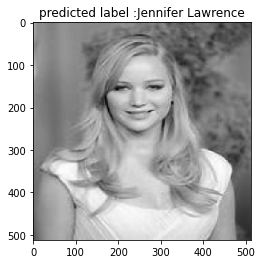

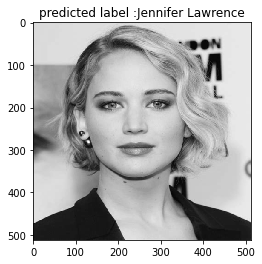

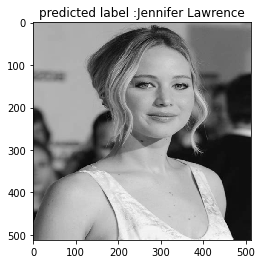

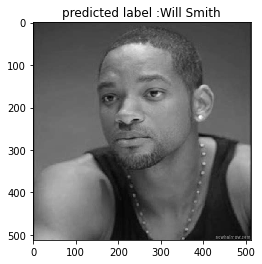

In [80]:
#Prediction Visualization
for i in(np.random.randint(0,6,4)):
  predicted_images=np.reshape(x_test[i],(512,512)).astype(np.float64)
  plt.title("predicted label :{}".format(y_pred[i]))
  plt.imshow(predicted_images,interpolation="nearest",cmap="gray")
  plt.show()

In [81]:
#Prediction Accuracy
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)

In [82]:
accuracy

0.7666666666666667

In [83]:
#Analysis of prediction
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,y_pred)

array([[16,  6,  2],
       [ 2, 12,  1],
       [ 1,  2, 18]])